# Kagome Real Space Structure from Python Code 

In [1]:
using PyCall

In [44]:
py"""

import matplotlib.pyplot as plt
import numpy as np

sqrt = np.sqrt

#Bravais vectors
a1_vec = np.array([2,0])
a2_vec = np.array([1,sqrt(3)])

l1 = l2 = 2 # number of unit-cell in each axes #!#
L = l1*l2 # number of unit-cells
N = 3*L # number of sites

#Basis vectors
b1=np.array([0,0]) #A atoms
b2=a1_vec/2 #B atoms
b3=a2_vec/2 #C atoms
Basis = [b1,b2,b3]
basis_colors=['red','blue','green']

coordinates = []
sites = []
atom_dict={}
for i1 in range(l1):
    for i2 in range(l2):
        Lp = a1_vec * i1 + a2_vec * i2
        center = a1_vec * i1 + a2_vec * i2 + b1
        shift = (-b2-b3)/sqrt(3)/2
        P1=np.array([center+shift,center+a1_vec+shift,center+a2_vec+shift])
        for ib, b in enumerate(Basis):
            atom_vec = Lp + b
            atom_no = 3 * i1 * l2 + 3 * i2 + ib
            site = [i1,i2,ib]
            sites.append(site)
            coordinates.append(atom_vec)
            atom_dict[tuple(site)]=atom_vec

NN = [[(0,0,1),(0,0,2),(-1,0,1),(0,-1,2)],
      [(0,0,-1),(0,0,1),(1,0,-1),(1,-1,1)],
      [(0,0,-1),(0,0,-2),(0,1,-2),(-1,1,-1)]]

NNN = [[(-1,0,2),(-1,1,1),(0,-1,1),(1,-1,2)],
      [(0,-1,1),(1,-1,-1),(0,1,-1),(1,0,1)],
      [(-1,1,-2),(-1,0,-1),(0,1,-1),(1,0,-2)]]

# t1 = -1;L1 = t2 = L2 = 0
t1 = -1;L1 = 0.28;t2 = -0.3;L2 = 0.2
hopps_NN = [[t1+1j*L1,t1-1j*L1,t1+1j*L1,t1-1j*L1], 
         [t1-1j*L1,t1+1j*L1,t1-1j*L1,t1+1j*L1], 
         [t1-1j*L1,t1+1j*L1,t1+1j*L1,t1-1j*L1]] 

hopps_NNN = [[t2+1j*L2,t2-1j*L2,t2-1j*L2,t2+1j*L2],
         [t2-1j*L2,t2+1j*L2,t2+1j*L2,t2-1j*L2],
         [t2-1j*L2,t2+1j*L2,t2+1j*L2,t2-1j*L2]]

H_NN = np.zeros([N,N],dtype=complex)
H_NNN = np.zeros([N,N],dtype=complex)

for atom_no in range(N):
    atom_site=sites[atom_no]
    for i_delta, delta in enumerate(NN[atom_site[2]]):
        neighbor_site = np.array(atom_site)+np.array(delta)
        neighbor_site[0] = neighbor_site[0]%l1
        neighbor_site[1] = neighbor_site[1]%l2    
        neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
        H_NN[neighbor_no,atom_no]=hopps_NN[atom_site[2]][i_delta]

for atom_no in range(N):
    atom_site=sites[atom_no]
    for i_delta, delta in enumerate(NNN[atom_site[2]]):
        neighbor_site = np.array(atom_site)+np.array(delta)
        neighbor_site[0] = neighbor_site[0]%l1
        neighbor_site[1] = neighbor_site[1]%l2    
        neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
        H_NNN[neighbor_no,atom_no]=hopps_NNN[atom_site[2]][i_delta]
"""

In [46]:
#Real Space Hamiltonian Matrix Getting by Python Code
H_NN = PyArray(py"H_NN"o)
H_NNN = PyArray(py"H_NNN"o)

12×12 PyArray{ComplexF64, 2}:
  0.0+0.0im   0.0+0.0im   0.0+0.0im  …   0.0+0.0im  -0.3+0.2im  -0.3-0.2im
  0.0+0.0im   0.0+0.0im   0.0+0.0im     -0.3-0.2im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im     -0.3+0.2im   0.0+0.0im   0.0+0.0im
  0.0+0.0im  -0.3+0.2im   0.0+0.0im      0.0+0.0im   0.0+0.0im  -0.3-0.2im
 -0.3-0.2im   0.0+0.0im  -0.3+0.2im      0.0+0.0im   0.0+0.0im  -0.3+0.2im
  0.0+0.0im  -0.3-0.2im   0.0+0.0im  …  -0.3+0.2im  -0.3-0.2im   0.0+0.0im
  0.0+0.0im   0.0+0.0im  -0.3-0.2im      0.0+0.0im  -0.3+0.2im   0.0+0.0im
  0.0+0.0im   0.0+0.0im  -0.3+0.2im     -0.3-0.2im   0.0+0.0im  -0.3+0.2im
 -0.3+0.2im  -0.3-0.2im   0.0+0.0im      0.0+0.0im  -0.3-0.2im   0.0+0.0im
  0.0+0.0im  -0.3+0.2im  -0.3-0.2im      0.0+0.0im   0.0+0.0im   0.0+0.0im
 -0.3-0.2im   0.0+0.0im   0.0+0.0im  …   0.0+0.0im   0.0+0.0im   0.0+0.0im
 -0.3+0.2im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im

# Many-Body

In [8]:
using QuantumOptics
using LinearAlgebra
using SparseArrays

In [47]:
#Number of Unit-cells Each Directions
Nx = Ny = py"l1"
N = 3*py"L"

12

In [48]:
#Create N Level Basis for Many-Body States
NBasis = NLevelBasis(N)

NLevel(N=12)

# Hard-Core Interaction

In [49]:
#All of states in N Fock Space for Hard-Core Interaction
HC_NStates = bosonstates(NBasis, [0,1]) # Occupation number is equal to 1 (Hard-Core Interaction)

13-element Vector{Vector{Int64}}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [50]:
#Create Hard-Core Many-Body Basis in Fock Space
HC_NBasis_MB = ManyBodyBasis(NBasis, HC_NStates)

ManyBody(onebodybasis=NLevel(N=12), states:13)

In [53]:
#NN and NNN Kagome Many-Body Hamiltonian
t1=py"t1"
t2=py"t2"
HC_Hamiltonian_MB = SparseOperator(HC_NBasis_MB)
for m in 1:N
    for n in 1:N
        HC_Hamiltonian_MB = HC_Hamiltonian_MB + t1 * H_NN[m,n] * transition(HC_NBasis_MB, m, n) + t2 * H_NNN[m,n] * transition(HC_NBasis_MB, m, n)
    end
end
#Energies of Hard-Core Interaction
eigenenergies(dense(HC_Hamiltonian_MB))

13-element Vector{Float64}:
 -2.9421023553303063
 -1.9428844535895595
 -1.9428844535895589
 -1.9428844535895586
 -1.4178976446696938
 -1.5696557096649747e-15
 -1.162107083350529e-17
  0.0
  5.121950481174837e-16
  1.9428844535895566
  1.9428844535895586
  1.94288445358956
  4.359999999999999

# Bose-Hubbard Model

\begin{equation}
H = -t \sum_{<ij>} \left( b_i^\dagger b_j + h.c. \right) + U/2 \sum_i n_i \left( n_i -1\right)
\end{equation}

In [58]:
#All of states in N Fock Space
NStates = bosonstates(NBasis, [0,1,2]) #Define Occupation Number for Many-Body Basis

91-element Vector{Vector{Int64}}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]

In [59]:
#Create Many-Body Basis in Fock Space
NBasis_MB = ManyBodyBasis(NBasis, NStates)

ManyBody(onebodybasis=NLevel(N=12), states:91)

In [60]:
#Bose-Hubbard Model for Kagome
t1=py"t1"
t2=py"t2"
U=2
#Kinetic term
KT = SparseOperator(NBasis_MB)
#Interaction term
IT = SparseOperator(NBasis_MB)
for m in 1:N
    IT = IT + U/2 * number(NBasis_MB, m) * (number(NBasis_MB, m) - identityoperator(NBasis_MB)) 
    for n in 1:N
        KT = KT - t1 * H_NN[m,n] * transition(NBasis_MB, m, n) - t2 * H_NNN[m,n] * transition(NBasis_MB, m, n)
    end
end
MB_Hamiltonian = KT + IT
#Energies of Many-Body Hamiltonian with On-Site Interaction
eigenenergies(dense(MB_Hamiltonian))

91-element Vector{Float64}:
 -8.584149305286402
 -6.038576363077336
 -6.038576363077332
 -6.03857636307733
 -4.359999999999999
 -4.197944243786974
 -4.197944243786963
 -4.197944243786958
 -3.876912072247789
 -3.713950915887763
 -3.593452155064916
 -3.5934521550649117
 -3.5934521550649094
  ⋮
  3.941689193185077
  3.941689193185081
  4.099021333369323
  4.254650990321209
  4.407280158013981
  4.4072801580139815
  4.407280158013985
  5.094416390649917
  5.384149483014973
  5.384149483014978
  5.3841494830149905
  6.138989924714485

In [61]:
using Plots

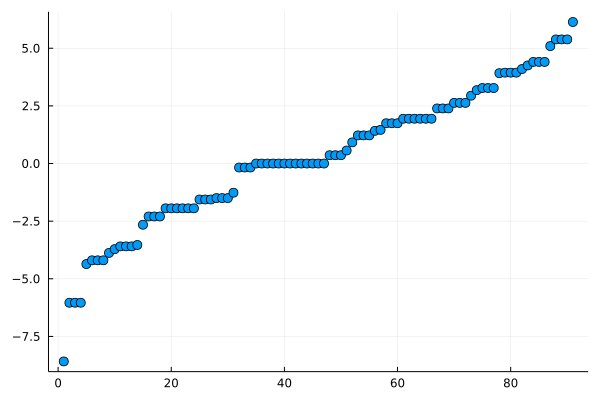

In [62]:
y = eigenenergies(dense(MB_Hamiltonian))
x=1:length(y)
gr()
plot(x, y, seriestype = :scatter, markersize = 5, legend=false)